# **Defunciones por incidentes de tránsito en Argentina**

**Miguel Torres Romero**<br>
Cientista Político<br>
Mg. (c) en Investigación en Ciencias Sociales<br>
Universidad de Buenos Aires

# **Abstract**
Este proyecto analiza las defunciones ocurridas por incidentes de tránsito en Argentina entre los años 2014 y 2017, a partir del dataset “BDD defunciones incidentes viales 2017”. El análisis se centra particularmente en el año 2017, con foco en la Provincia de Buenos Aires y la Ciudad Autónoma de Buenos Aires (CABA). El objetivo principal es identificar patrones recurrentes relacionados con el tipo de accidente, ubicación, horario, edad, sexo de las víctimas y condiciones del incidente.

A partir de este enfoque, se propone explorar tres dimensiones clave: (1) temporalidad de los accidentes, (2) factores demográficos de las víctimas, y (3) relación entre tipo de vehículo, hora del día y mortalidad. Se identifican valores faltantes, se realiza la limpieza correspondiente y se diseñan visualizaciones univariadas, bivariadas y multivariadas que permiten vincular los resultados con las preguntas planteadas. Este análisis busca aportar insumos que sean útiles para diseñar políticas públicas de prevención, campañas de concientización y estrategias de seguridad vial en zonas urbanas y periurbanas del país.

Se presentan mapas de calor, diagramas de dispersión, gráficos de barras apiladas y boxplots, todos con su respectivo análisis numérico e interpretación. Finalmente, se discute la replicabilidad del modelo en años futuros y se plantean líneas de desarrollo para incorporar técnicas de modelado predictivo o clustering.

# **Preguntas e hipótesis**

**Preguntas**:<br>
1. ¿Qué momento del día concentra más muertes por accidente de tránsito?
2. ¿Qué tipo de vehículo y sexo están más involucrados en incidentes nocturnos?
3. ¿Hay diferencias en la edad de las víctimas según el tipo de vía y vehículo?
4. ¿Qué combinación de clima y momento del día aparece con más frecuencia?
5. ¿Qué clase de víctima es más común según el sexo y el momento del hecho?
<br>
<br>
**Hipótesis:**<br>
- Las muertes son más frecuentes durante la noche, especialmente en motocicletas.
- Los varones están más involucrados en siniestros nocturnos.
- Las rutas provinciales concentran víctimas más jóvenes que las calles.
- El clima “bueno” no reduce la cantidad de muertes, porque otros factores dominan.
- Los conductores varones están sobrerrepresentados como víctimas en accidentes fatales.


# **Gráficos**

In [14]:
# Carga de datos
import pandas as pd

# Cargar solo la tabla de Incidentes CABA como ejemplo
df_defunciones = pd.read_excel("/content/BDD defunciones-incidentes-viales-2017.xlsx")

# Ver primeras filas
df_defunciones.head()


,Fuente de datos,Numero de victima,ID municipio,Municipio,Fecha,Horario,Momento del hecho,Edad,Sexo,Clase victima,Vehiculo victima,Via,Incidente tipo,Clima,Cantidad de accidentes
0,Egresos hospitalarios,2-2017-1293,NaN,NaN,2016-12-14,Sin especificar,Sin especificar,75,Masculino,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,1
1,Ministerio de Seguridad,1-2017-1,60412.0,Jose C. Paz,2017-01-01,07:10:00,Diurno,21,Masculino,Conductor,Vehiculo,Ruta provincial,Colision Vehiculo/Vehiculo,Bueno,1
2,Ministerio de Seguridad,1-2017-1039,60412.0,Jose C. Paz,2017-01-01,06:05:00,Nocturno,22,Masculino,Conductor,Motocicleta,Calle,Colision Vehiculo/Vehiculo,Sin especificar,1
3,Ministerio de Seguridad,1-2017-2,60412.0,Jose C. Paz,2017-01-01,07:10:00,Diurno,42,Masculino,Conductor,Vehiculo,Ruta provincial,Colision Vehiculo/Vehiculo,Bueno,1
4,Ministerio de Seguridad,1-2017-592,60098.0,Berisso,2017-01-01,01:40:00,Nocturno,18,Masculino,Conductor,Motocicleta,Calle,Colision Vehiculo/Vehiculo,Bueno,1


In [15]:
tabla = pd.crosstab(
    index=[df_defunciones['Momento del hecho']],
    columns=[df_defunciones['Vehiculo victima'], df_defunciones['Sexo']]
)
tabla


Vehiculo victima  Automovil           Bicicleta           Camioneta            \
Sexo               Femenino Masculino  Femenino Masculino  Femenino Masculino   
Momento del hecho                                                               
Diurno                   45        66         3        16         6        21   
Nocturno                 26       105         3         9        10        14   
Sin Especificar           0         0         0         0         0         0   
Sin especificar           1         0         0         0         0         0   

Vehiculo victima     Camión Colectivo           Motocicleta            \
Sexo              Masculino  Femenino Masculino    Femenino Masculino   
Momento del hecho                                                       
Diurno                    6         0         1           8       125   
Nocturno                  9         1         3          22       151   
Sin Especificar           0         0         0           0         0   
Sin especificar           1         0         0           0         1   

Vehiculo victima       Otro   Peaton           Sin especificar            \
Sexo              Masculino Femenino Masculino        Femenino Masculino   
Momento del hecho                                                          
Diurno                    3       22        33               9        37   
Nocturno                  1       13        41               7        41   
Sin Especificar           0        0         1               0         0   
Sin especificar           0        0         0              26        68   

Vehiculo victima  Vehiculo            
Sexo              Femenino Masculino  
Momento del hecho                     
Diurno                   4        14  
Nocturno                 6        13  
Sin Especificar          0         0  
Sin especificar          0         0

**Gráfico 1: Momento del hecho + Vehículo + Sexo**

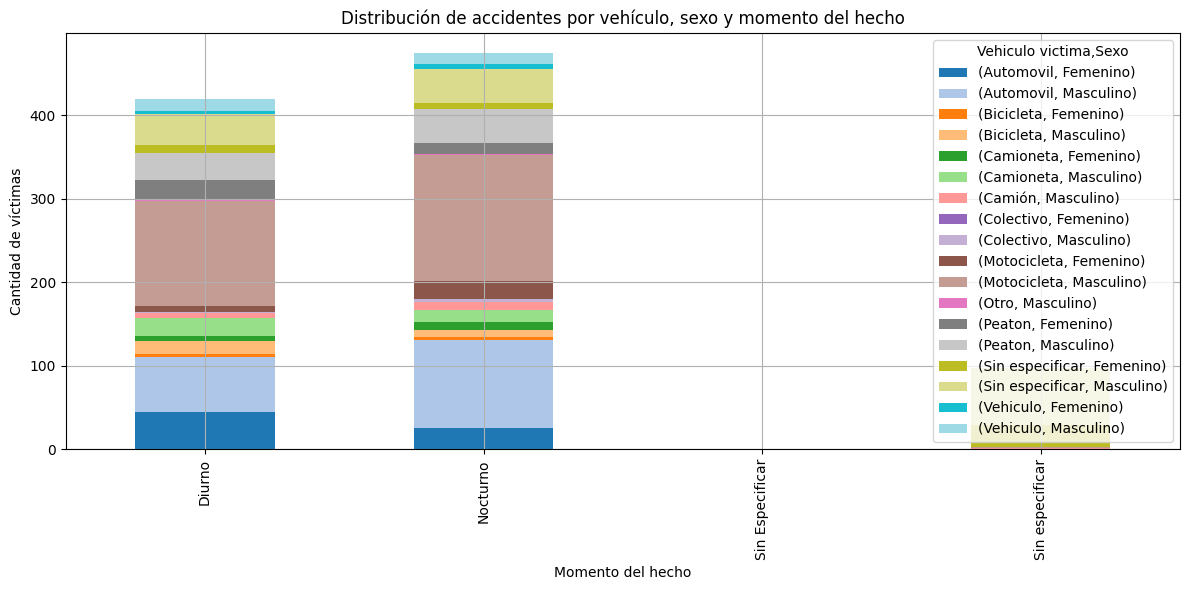

In [17]:
tabla1 = pd.crosstab(
    df_defunciones['Momento del hecho'],
    [df_defunciones['Vehiculo victima'], df_defunciones['Sexo']]
)
tabla1.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Distribución de accidentes por vehículo, sexo y momento del hecho')
plt.ylabel('Cantidad de víctimas')
plt.grid(True)
plt.tight_layout()
plt.show()


**Diagnóstico:**
<br>
El Gráfico 1 revela que la mayor cantidad de muertes por accidentes de tránsito ocurre durante el momento nocturno, superando ampliamente al diurno. Esta tendencia se observa de manera consistente en casi todos los tipos de vehículos. En particular, las motocicletas representan el tipo de vehículo con mayor incidencia en víctimas nocturnas (151 masculinos vs 125 diurnos), destacando su peligrosidad en horas de baja visibilidad. Esto podría deberse a factores como la reducción de la visibilidad, la fatiga, mayor velocidad, o conductas de riesgo nocturnas. Por ende, las políticas de prevención y control deberían priorizar la seguridad vial en horarios nocturnos, enfocándose especialmente en motociclistas.

**Gráfico 2: Edad promedio por tipo de vía y tipo de vehículo**

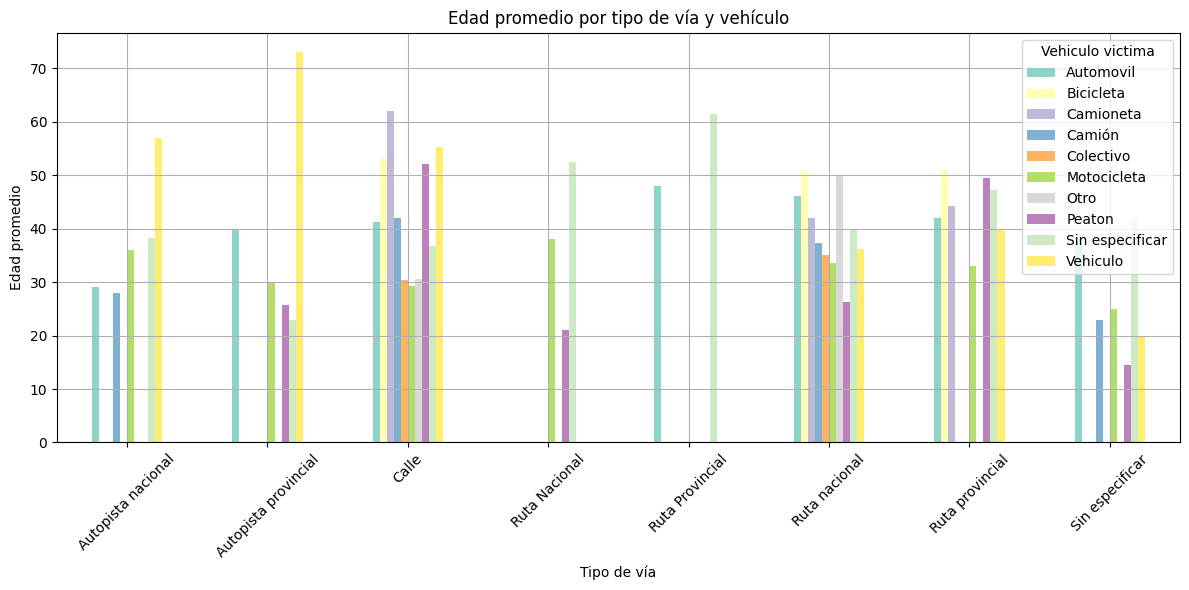

In [20]:
df_grouped = df_defunciones.groupby(['Via', 'Vehiculo victima'])['Edad'].mean().unstack().fillna(0)
df_grouped.plot(kind='bar', figsize=(12,6), colormap='Set3')
plt.title('Edad promedio por tipo de vía y vehículo')
plt.ylabel('Edad promedio')
plt.xlabel('Tipo de vía')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Diagnóstico:**
<br>
La edad promedio de las víctimas varía según el tipo de vía y vehículo. En calles, las víctimas de bicicletas y peatones son las de mayor edad, superando los 50 años. En autopistas y rutas, las víctimas suelen ser más jóvenes, especialmente quienes van en automóviles y camiones, con edades promedio entre 28 y 39 años. Esto indica que en vías urbanas las víctimas son generalmente mayores, mientras que en vías rápidas predominan adultos jóvenes y personas en vehículos pesados.

**Gráfico 3: Clima + momento del hecho + cantidad de accidentes**

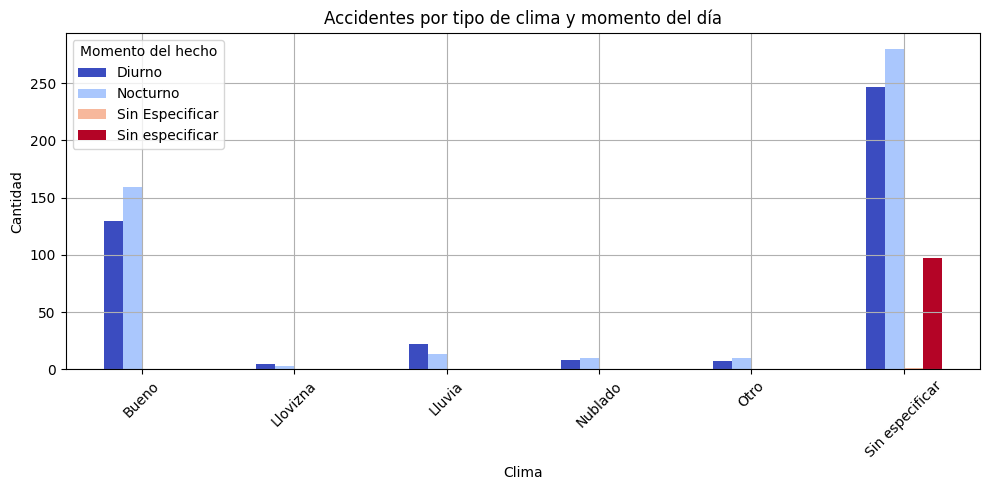

In [21]:
tabla3 = pd.crosstab(df_defunciones['Clima'], df_defunciones['Momento del hecho'])
tabla3.plot(kind='bar', figsize=(10,5), colormap='coolwarm')
plt.title('Accidentes por tipo de clima y momento del día')
plt.xlabel('Clima')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Diagnóstico:**
<br>
La mayoría de los accidentes ocurren bajo clima "Bueno", especialmente de noche, con 159 casos frente a 130 en el día. Las condiciones adversas como lluvia y llovizna representan un porcentaje mucho menor de accidentes. Además, hay un alto número de registros sin especificar clima, lo que limita un análisis más preciso, pero se observa que la nocturnidad incrementa la cantidad de accidentes en general.



**Gráfico 4: Clase de víctima + sexo + momento del hecho**

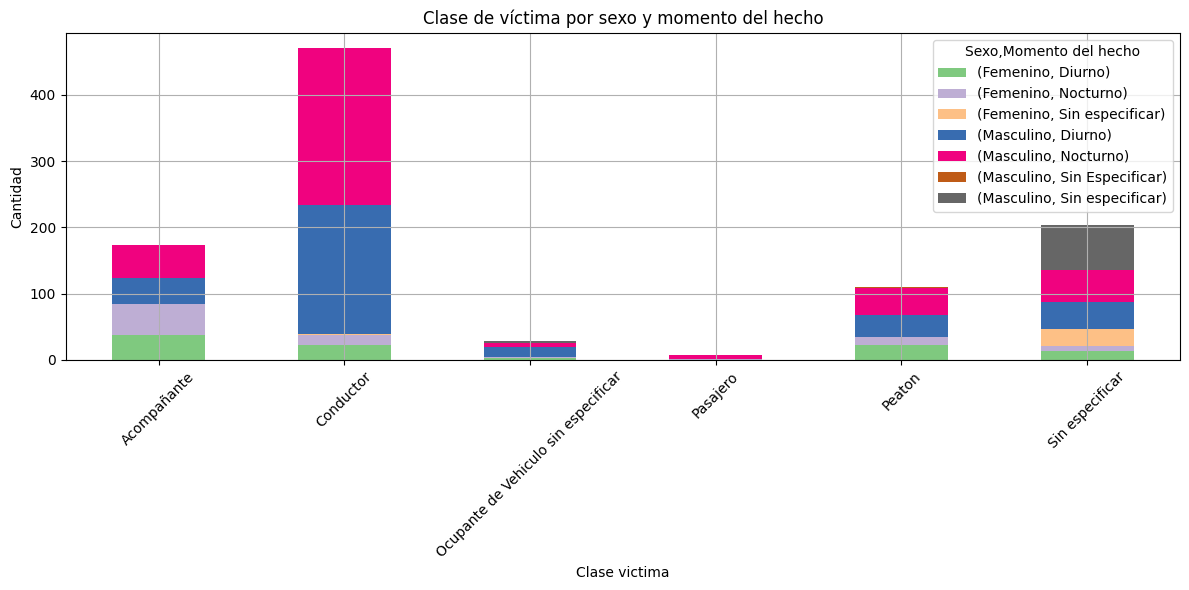

In [22]:
tabla4 = pd.crosstab(df_defunciones['Clase victima'], [df_defunciones['Sexo'], df_defunciones['Momento del hecho']])
tabla4.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title('Clase de víctima por sexo y momento del hecho')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Diagnóstico:**
<br>
Los conductores masculinos son el grupo con más víctimas, predominando en ambos momentos, diurno y nocturno. Las mujeres tienen menos víctimas conductoras y más acompañantes afectadas. Los peatones y acompañantes también representan una proporción importante, con una presencia relativamente equilibrada entre sexos. Hay un número considerable de casos sin especificar clase de víctima, especialmente en el sexo femenino.



**Gráfico 5: Tipo de vía + clase de víctima + sexo**

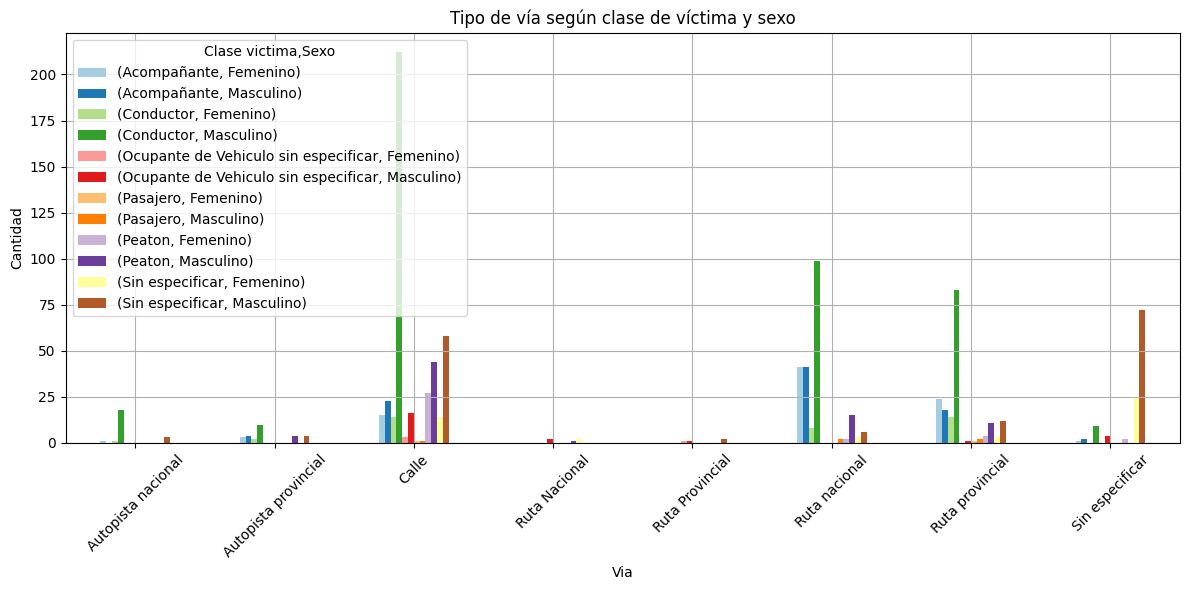

In [23]:
tabla5 = pd.crosstab(df_defunciones['Via'], [df_defunciones['Clase victima'], df_defunciones['Sexo']])
tabla5.plot(kind='bar', figsize=(12,6), colormap='Paired')
plt.title('Tipo de vía según clase de víctima y sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Diagnóstico:**
<br>
Las calles concentran la mayor cantidad de víctimas, especialmente conductores masculinos, seguidos por peatones y acompañantes. En autopistas nacionales y provinciales predominan los conductores masculinos, mientras que en rutas nacionales y provinciales hay una distribución más equilibrada entre acompañantes y conductores de ambos sexos. Un número significativo de víctimas no tiene especificado el tipo de vía ni la clase de víctima.

# **Identificación de valores perdidos**

In [24]:
valores_nulos = df_defunciones.isnull().sum()
valores_nulos[valores_nulos > 0]


,0
ID municipio,557
Municipio,557
Edad,98


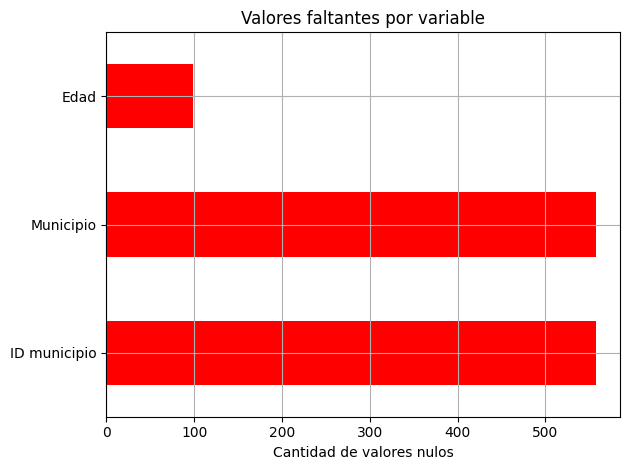

In [25]:
valores_nulos[valores_nulos > 0].plot(kind='barh', color='red')
plt.title('Valores faltantes por variable')
plt.xlabel('Cantidad de valores nulos')
plt.grid(True)
plt.tight_layout()
plt.show()
